In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

In [19]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [20]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

C:\Users\Kashish Gandhi\AppData\Local\Temp\ipykernel_107952\2461572216.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


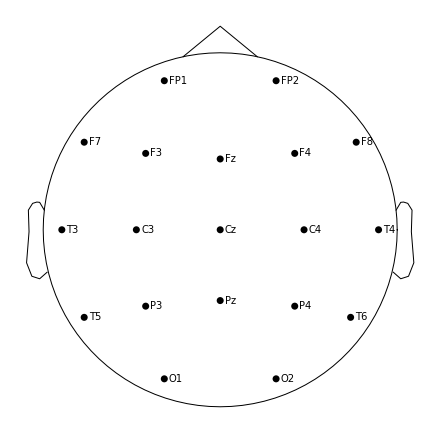

In [21]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [22]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):

    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vlim = (vmin,vmax),
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [23]:
df = pd.read_csv(R'C:\Users\Kashish Gandhi\Desktop\Synergy\EEG.machinelearing_data_BRMH.csv')
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [24]:
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df.head()

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860


In [25]:
def reformat_name(name):
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
df.set_axis(new_colnames, axis=1, inplace=True)
df.columns

Index(['main.disorder', 'specific.disorder', 'delta.FP1', 'delta.FP2',
       'delta.F7', 'delta.F3', 'delta.Fz', 'delta.F4', 'delta.F8', 'delta.T3',
       ...
       'gamma.Cz', 'gamma.C4', 'gamma.T4', 'gamma.T5', 'gamma.P3', 'gamma.Pz',
       'gamma.P4', 'gamma.T6', 'gamma.O1', 'gamma.O2'],
      dtype='object', length=116)

In [26]:
main_mean = df.groupby('main.disorder').mean().reset_index()
spec_mean = df.groupby('specific.disorder').mean().reset_index()
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')
main_mean

,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698


In [27]:
main_mean.loc['Schizophrenia', 'gamma']

channel
FP1    3.681332
FP2    3.840776
F7     3.586139
F3     3.380585
Fz     3.279946
F4     3.411508
F8     3.784580
T3     4.228335
C3     3.165926
Cz     3.080554
C4     3.041254
T4     3.387337
T5     2.435776
P3     2.736861
Pz     2.799705
P4     2.865227
T6     2.966232
O1     4.257993
O2     3.868594
Name: gamma, dtype: float64

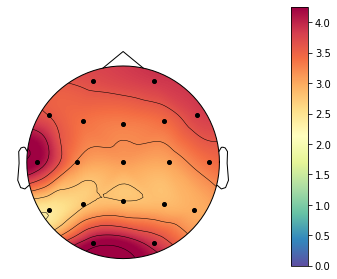

In [28]:
# extract power for one main.disorder and one band
test =  main_mean.loc['Schizophrenia', 'gamma']
# make sure that channels are in correct order
assert (test.index == channels.index).all()
# plot
fig, ax = plt.subplots()
plot_eeg(test, channels.to_numpy(), ax, fig, vmin=0, marker_style={'markersize':4, 'markerfacecolor':'black'})
plt.show()

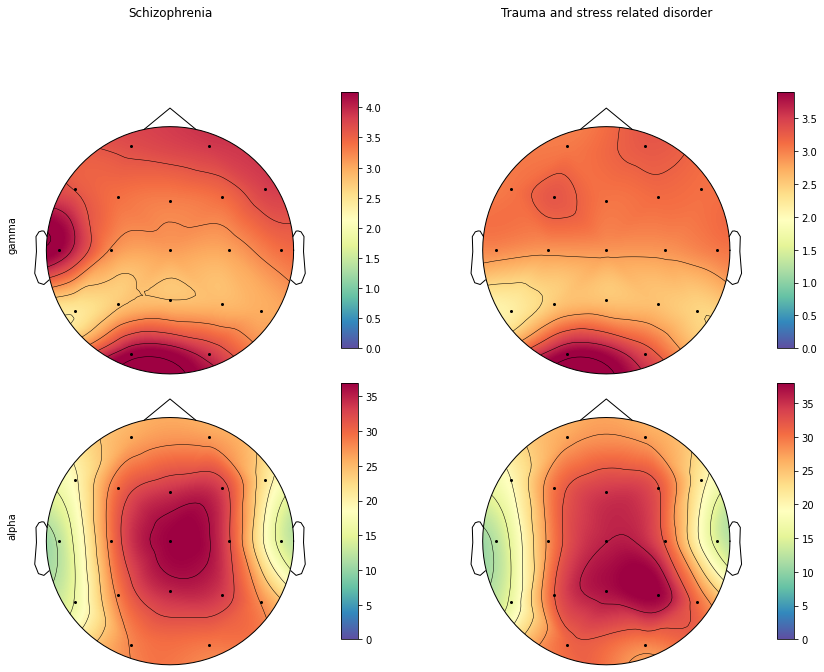

In [114]:
fig = plt.figure(constrained_layout=True, figsize=(12, 8))  # Adjust figsize as needed

test2 = [
     main_mean.loc['Schizophrenia', 'gamma'],
     main_mean.loc['Trauma and stress related disorder', 'gamma'],
     main_mean.loc['Schizophrenia', 'alpha'],
     main_mean.loc['Trauma and stress related disorder', 'alpha'],
]

subfigs = fig.subfigures(2, 2)
for subfig, test1 in zip(subfigs.flatten(), test2):
    ax = subfig.subplots()
    plot_eeg(test1, channels.to_numpy(), ax, subfig, vmin=0, marker_style={'markersize': 2, 'markerfacecolor': 'black'})

subfigs[0, 0].suptitle('Schizophrenia', y=1.3)
subfigs[0, 1].suptitle('Trauma and stress related disorder', y=1.3)
subfigs[0, 0].axes[0].set_ylabel('gamma')
subfigs[1, 0].axes[0].set_ylabel('alpha')
subfigs[0, 1].axes[0].set_ylabel(' ')
subfigs[1, 1].axes[0].set_ylabel(' ')
plt.show()


In [115]:
import numpy as np
import matplotlib.pyplot as plt
import mne
def plot_eeg_dataset(dataset, channels, gwidth=2, gheight=1.5, wspace=0,
                     marker_style={'markersize': 2, 'markerfacecolor': 'black'},
                     band_ordered=None, conditions_ordered=None, band_labels=None,
                     condition_labels=None, **kwargs):
    if band_ordered is None:
        band_ordered = dataset.columns
    if conditions_ordered is None:
        conditions_ordered = dataset.index.get_level_values(0).unique()
    if band_labels is None:
        band_labels = band_ordered
    if condition_labels is None:
        condition_labels = conditions_ordered
    # number of rows in figure
    nrows = len(band_ordered)
    # number of columns in figure
    ncols = len(conditions_ordered)
    # create figure with width gwidth and gheight per graph
    fig = plt.figure(constrained_layout=True, figsize=(gwidth*ncols, gheight*nrows))
    # create subfigures
    subfigs = fig.subfigures(nrows, ncols, wspace=wspace)
    # loop through subfigures
    for ind, subfig in np.ndenumerate(subfigs):
        i, j = ind
        # select band (column name in main_mean)
        band = band_ordered[i]
        # select disorder (row name in main_mean)
        disorder = conditions_ordered[j]
        # select band levels for disorder
        levels = dataset.loc[disorder, band]
        # calculate maximum (vmax) for easier comparison between disorders
        vmax = ceil(max(dataset[band]))
        # create axes
        ax = subfig.subplots()
        # plot eeg
        plot_eeg(levels, channels.to_numpy(), ax, subfig, vmin=0, vmax=vmax, marker_style=marker_style, **kwargs)
        # annotate band (if needed)
        if j == 0:
            ax.set_ylabel(band_labels[i])
        # annotate disorder (if needed)
        if i == 0:
            subfig.suptitle(condition_labels[j], y=1.3)
    return fig, subfigs


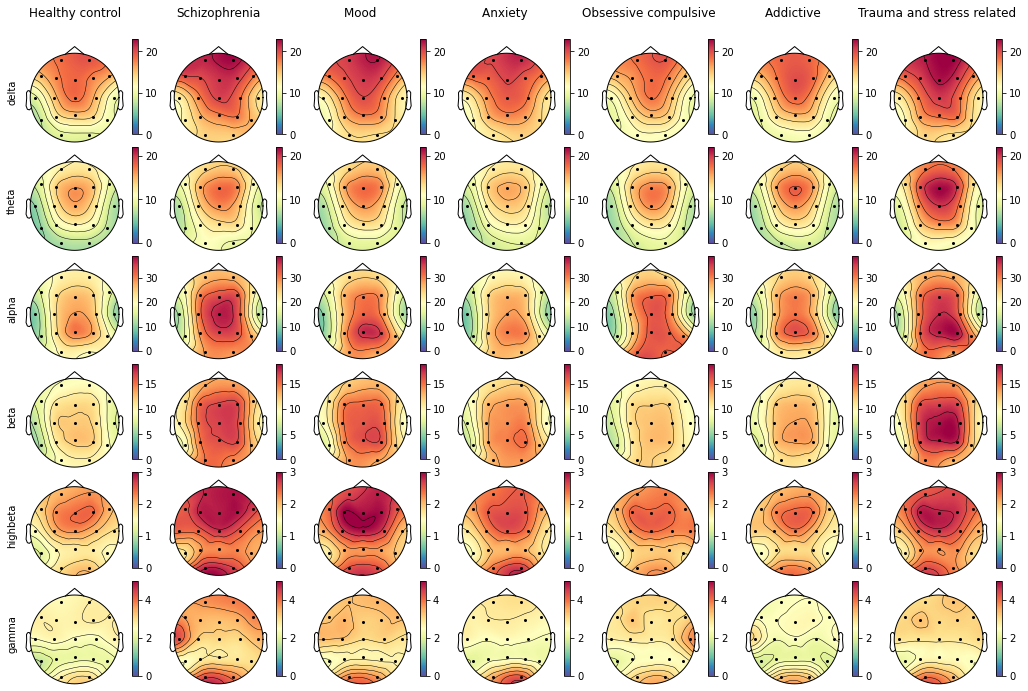

In [116]:
conds = ['Healthy control',
         'Schizophrenia', 
         'Mood disorder', 
         'Anxiety disorder',  
         'Obsessive compulsive disorder', 
         'Addictive disorder',
         'Trauma and stress related disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(main_mean, channels, conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

In [29]:
df=main_mean

In [30]:
df_reset = df.reset_index()
df_reset

,main.disorder,channel,delta,theta,alpha,beta,highbeta,gamma
0,Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
1,Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
2,Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
3,Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
4,Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...,...
128,Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
129,Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
130,Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698
131,Schizophrenia,O2,14.780898,9.635807,28.995409,14.521340,2.627968,3.868594


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df=df_reset
# Encoding categorical 'channel' variable
le_channel = LabelEncoder()
df['channel_encoded'] = le_channel.fit_transform(df['channel'])

# Separate features (X) and target variable (y)
X = df[['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma', 'channel_encoded']]
y = df['main.disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Example to predict using specific input
input_data = pd.DataFrame({
    'delta': [15.0],
    'theta': [10.0],
    'alpha': [25.0],
    'beta': [12.0],
    'highbeta': [2.5],
    'gamma': [3.0],
    'channel_encoded': [le_channel.transform(['FP1'])[0]]  # Encode 'FP1' using the LabelEncoder
})

# Predict the main disorder
predicted_disorder = clf.predict(input_data)[0]
print("Predicted Disorder:", predicted_disorder)


Predicted Disorder: Healthy control
